In [22]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Loading the data
file_path = "source/WA_Fn-UseC_-Telco-Customer-Churn.csv"
try:
    customer_df = pd.read_csv(file_path)
except FileNotFoundError:
    print("error finding the file")
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Dataframe information
print(f"dataframe shape :{customer_df.shape}")
customer_df.info()

dataframe shape :(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilli

In [25]:
# Lets check for missing values
customer_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
# ToTalCHharges column have some NaN values
customer_df['TotalCharges'] = pd.to_numeric(customer_df['TotalCharges'], errors='coerce')
print(customer_df["TotalCharges"].isnull().sum())
customer_df[(customer_df["TotalCharges"].isnull())].TotalCharges

11


488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [27]:
# Lets fill those NuN values with the median value for TotalCharges
customer_df["TotalCharges"] = customer_df['TotalCharges'].fillna(customer_df['TotalCharges'].median())
print(customer_df["TotalCharges"].isnull().sum())

0


      Churn
      count
Churn      
No     5174
Yes    1869


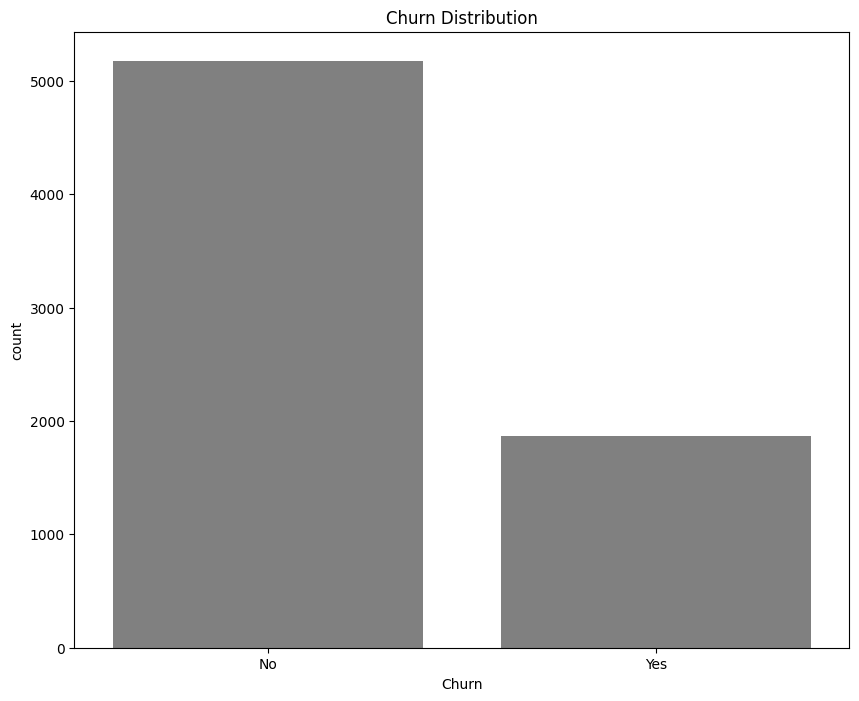

In [28]:
# What is the distribution of the Churn column
plt.figure(figsize=(10,8))
sns.countplot(data=customer_df, x="Churn", color="grey")
plt.title("Churn Distribution")

print(customer_df.groupby("Churn").agg({"Churn":["count"]}))


In [29]:
# CustomerID column is not useful for Churn prediction so we drop it
customer_df = customer_df.drop(columns="customerID")
customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
customer_df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [31]:
# What is the number of unique values in each categorical column 
categorical_cols = customer_df.select_dtypes(include="object").columns.tolist()
customer_df[categorical_cols].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [32]:
# Lets use One-Hot Encoding for categorical columns
encoder = OneHotEncoder(sparse_output=False, drop="first")

encoded_data = encoder.fit_transform(customer_df[categorical_cols])
encoded_cols = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_data, columns = encoded_cols)
encoded_df.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [33]:
# Combine the encoded categorical columns with the numerical columns
numeric_cols = customer_df.select_dtypes(exclude="object").columns.tolist()
encoded_df[numeric_cols] = customer_df[numeric_cols]
encoded_df.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0,1,29.85,29.85
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0,34,56.95,1889.50
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0,2,53.85,108.15
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,45,42.30,1840.75
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0,2,70.70,151.65


In [34]:
# Slit the data into training and testing sets
features = encoded_df.drop(columns="Churn_Yes").columns.tolist()
y = encoded_df["Churn_Yes"]
x = encoded_df[features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

In [35]:
# Scaling the features 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
# A function to plot confusion matrix for each model
def confusion_m(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp1 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp1.plot()

accuracy :0.78


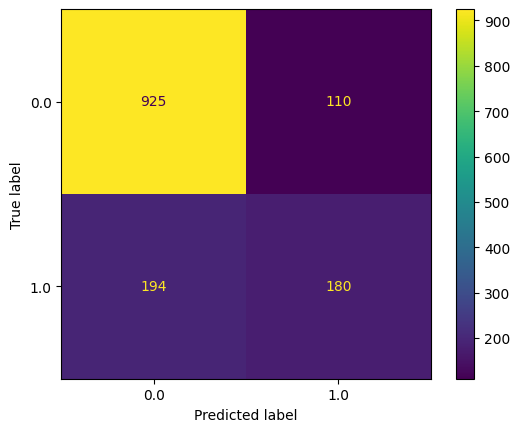

In [37]:
# 1st Model we use RandomForestClassifier
model = RandomForestClassifier(random_state = 42, class_weight="balanced", n_estimators=100)
model.fit(x_train, y_train)
predictions_1 = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions_1)
print(f"accuracy :{accuracy:.2f}")
confusion_m(predictions_1)

accuracy 2 :0.73


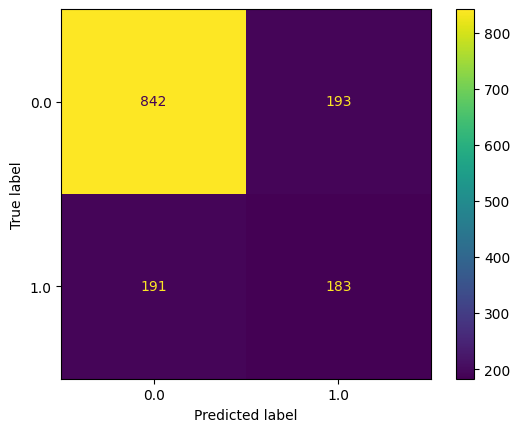

In [38]:
# 2nd Model we use DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state = 42, class_weight="balanced")
model2.fit(x_train, y_train)
prediction_2 = model2.predict(x_test)
accuracy2 = accuracy_score(y_test, prediction_2)
print(f"accuracy 2 :{accuracy2:.2f}")
confusion_m(prediction_2)

accuracy 3 :0.74


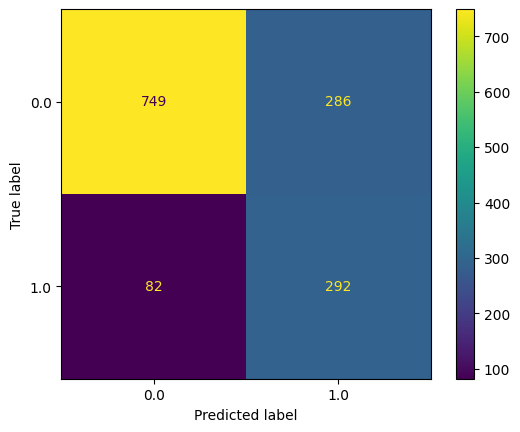

In [39]:
# 3rd Model LogisticRegression
model3 = LogisticRegression(random_state = 42, class_weight = "balanced")
model3.fit(x_train, y_train)
prediction3 = model3.predict(x_test)
accuracy3 = accuracy_score(y_test, prediction3)
print(f"accuracy 3 :{accuracy3:.2f}")
confusion_m(prediction3)

Text(0.5, 1.0, 'The importance of features in predicting customer churn')

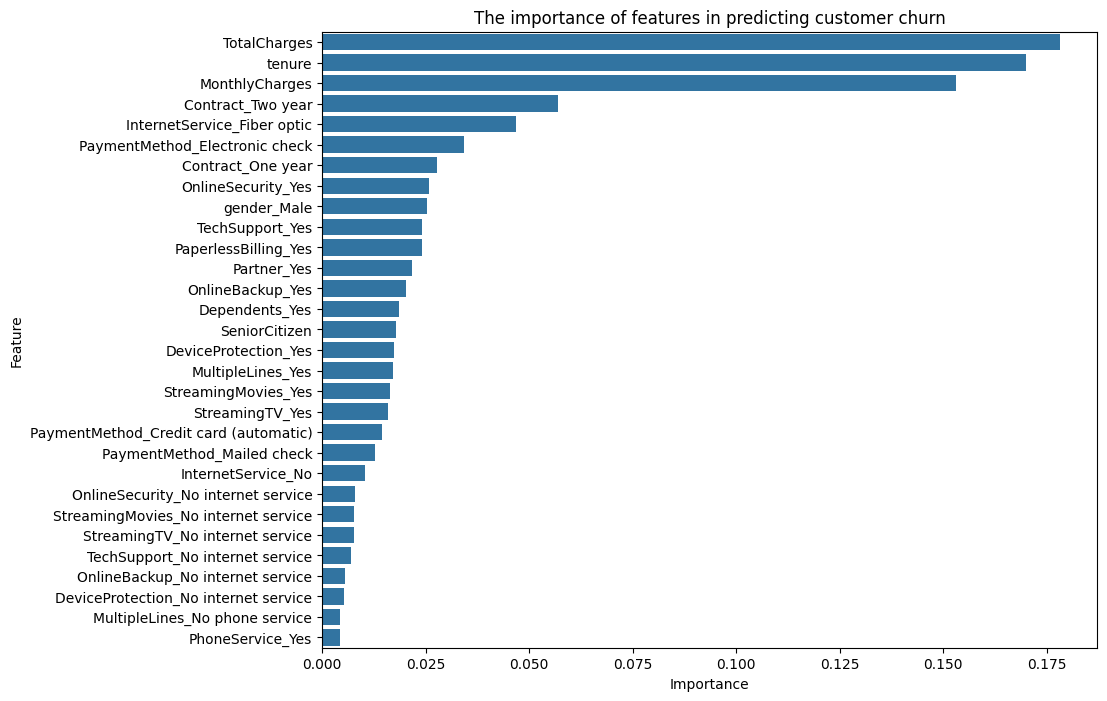

In [40]:
# Feature importance from RandomForestClassifier
importance = model.feature_importances_
importance_df = pd.DataFrame({"Feature":features, "Importance":importance})
plt.figure(figsize=(10,8))
sns.barplot(data=importance_df.sort_values(by="Importance", ascending=False), x="Importance", y="Feature")
plt.title("The importance of features in predicting customer churn")